In [93]:
# Libraries
import numpy as np
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data = pd.read_csv("../Data/Student_Performance.csv")

In [95]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [96]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [97]:
data.isnull().values

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

Data Preprocessing

In [98]:
data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [99]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({"Yes": 0, "No": 1})
data['Extracurricular Activities']

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: Extracurricular Activities, Length: 10000, dtype: int64

In [100]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0,9,1,91.0
1,4,82,1,4,2,65.0
2,8,51,0,7,2,45.0
3,5,52,0,5,2,36.0
4,7,75,1,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,0,4,2,23.0
9996,7,64,0,8,5,58.0
9997,6,83,0,8,5,74.0
9998,9,97,0,7,0,95.0


In [101]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0,9,1,91.0
1,4,82,1,4,2,65.0
2,8,51,0,7,2,45.0
3,5,52,0,5,2,36.0
4,7,75,1,8,5,66.0


In [102]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0,9,1,91.0
1,4,82,1,4,2,65.0
2,8,51,0,7,2,45.0
3,5,52,0,5,2,36.0
4,7,75,1,8,5,66.0


In [103]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

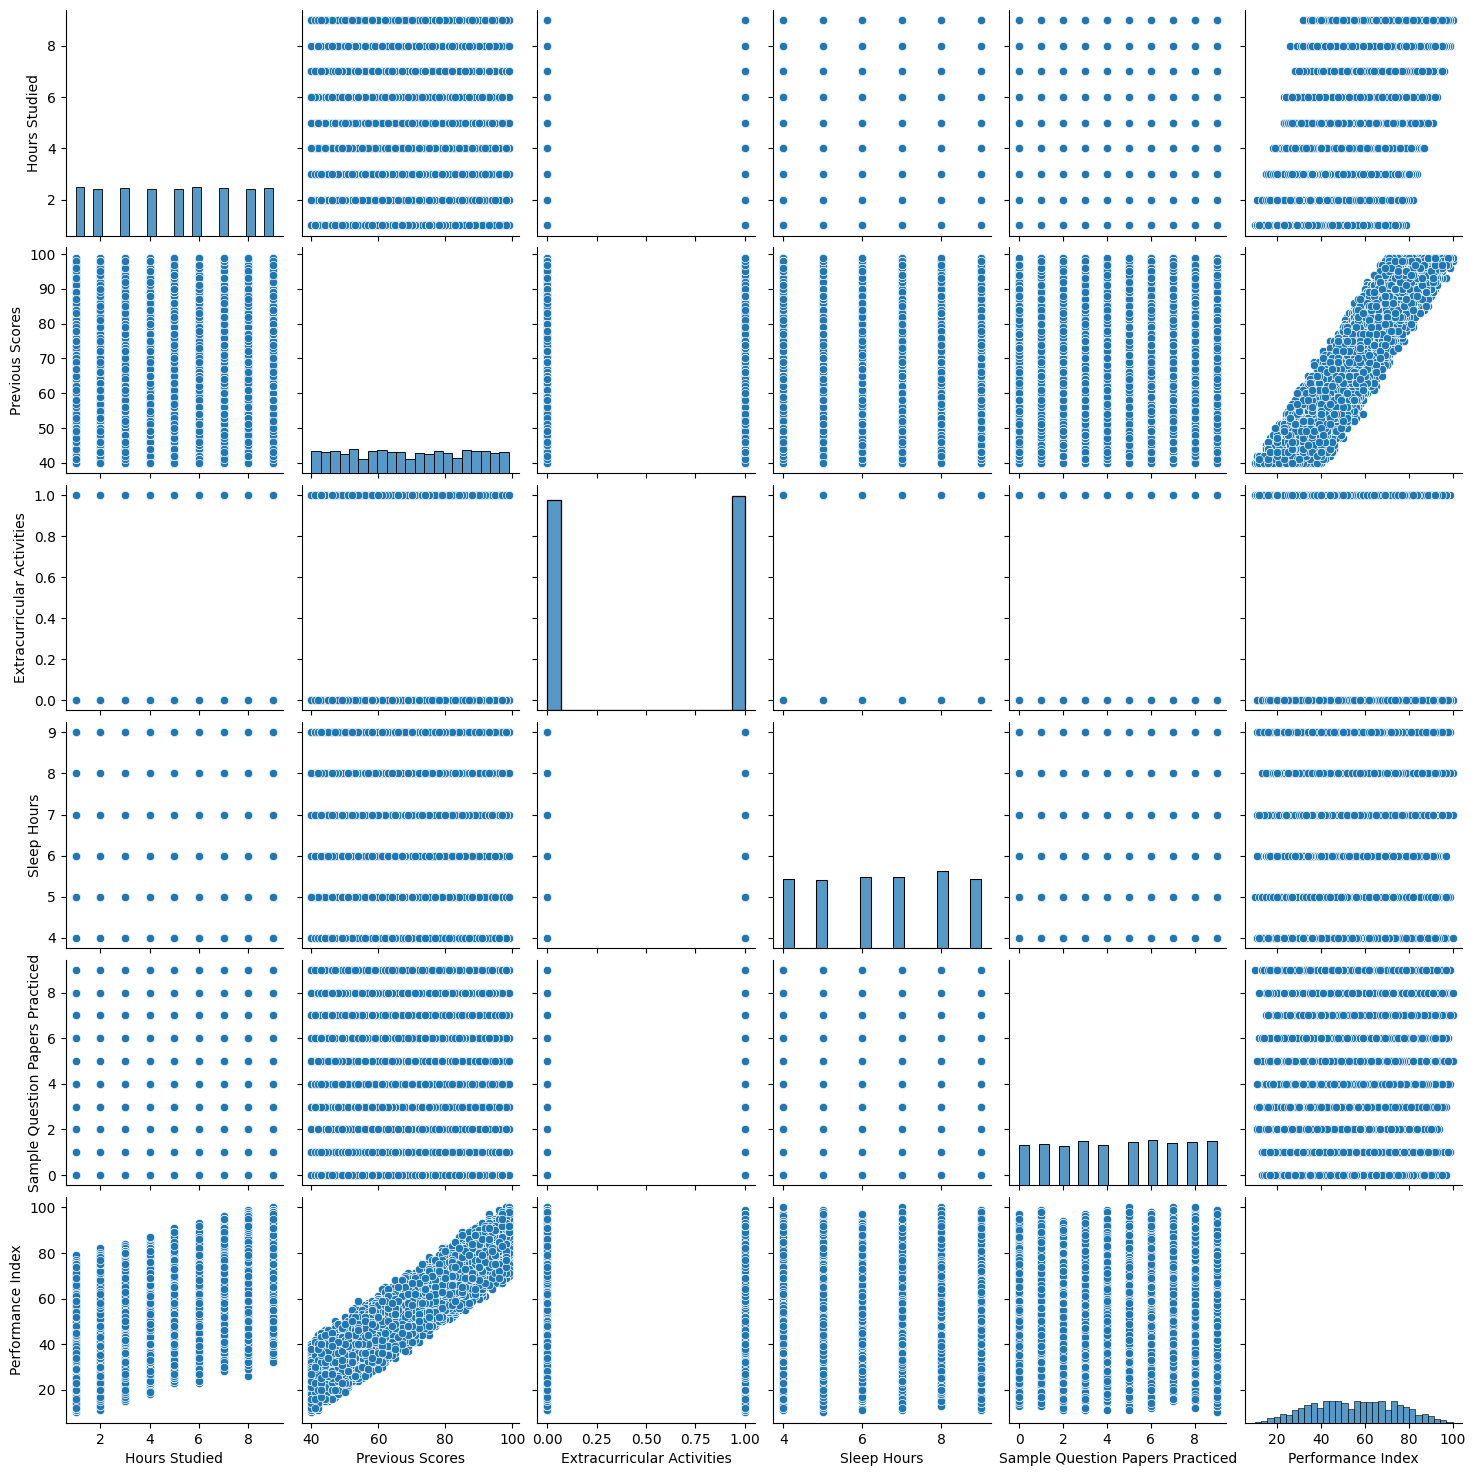

In [104]:
sns.pairplot(data)

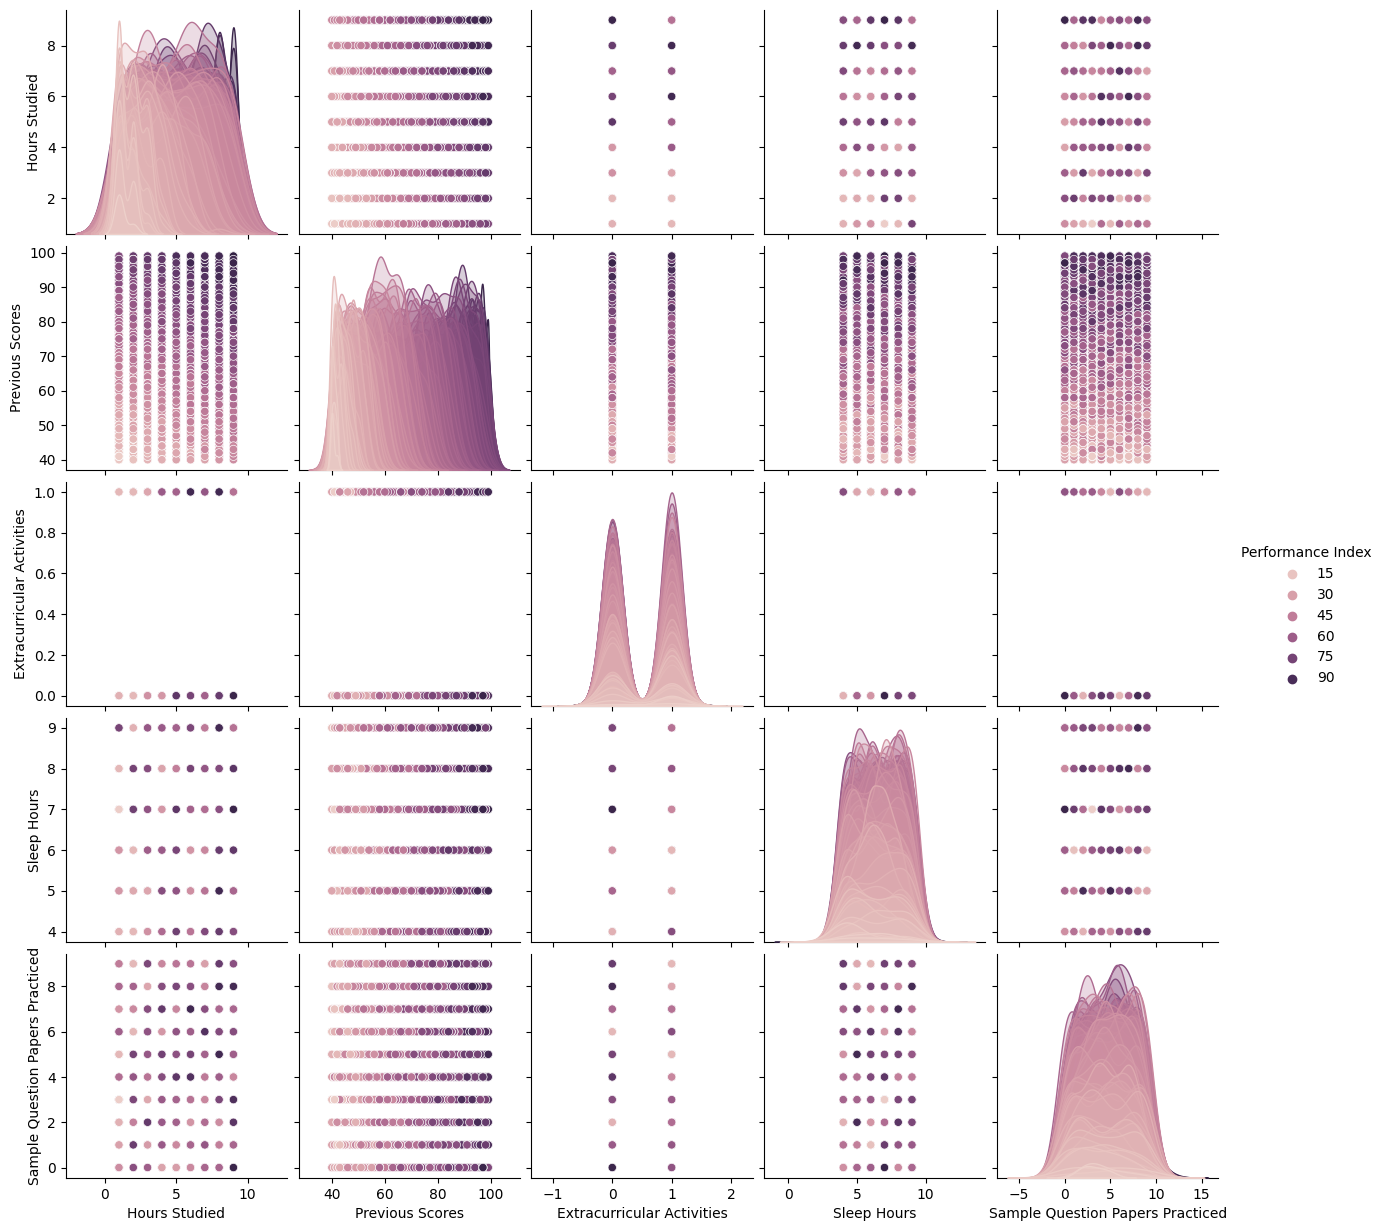

In [105]:
sns.pairplot(data, hue='Performance Index')

In [106]:
print("Number of samples in x:", len(x))
print("Number of samples in y:", len(y))

Number of samples in x: 10000
Number of samples in y: 10000


Model Splitting

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [109]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Neural Network Construction

In [110]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [111]:
model = Sequential([
    keras.layers.Dense(16, 
                       input_shape = (5,), 
                       activation = 'relu'), # Input Layer
    keras.layers.Dense(8, 
                       activation = 'relu'), # Hidden Layer
    keras.layers.Dense(1, 
                       activation = 'linear')
])

In [112]:
model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics= ['mae']
)

In [113]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


250/250 [==============================] - 0s 379us/step - loss: 2963.3345 - mae: 50.8643
Epoch 2/100
250/250 [==============================] - 0s 328us/step - loss: 907.5855 - mae: 24.9922
Epoch 3/100
250/250 [==============================] - 0s 318us/step - loss: 61.7430 - mae: 6.3240
Epoch 4/100
250/250 [==============================] - 0s 326us/step - loss: 40.8035 - mae: 5.0703
Epoch 5/100
250/250 [==============================] - 0s 322us/step - loss: 33.7777 - mae: 4.6100
Epoch 6/100
250/250 [==============================] - 0s 324us/step - loss: 28.7257 - mae: 4.2583
Epoch 7/100
250/250 [==============================] - 0s 318us/step - loss: 24.6708 - mae: 3.9475
Epoch 8/100
250/250 [==============================] - 0s 316us/step - loss: 21.2503 - mae: 3.6642
Epoch 9/100
250/250 [==============================] - 0s 319us/step - loss: 18.2312 - mae: 3.3882
Epoch 10/100
250/250 [==============================] - 0s 321us/step - loss: 15.5745 - mae: 3.1278
Epoch 11/100
250

In [114]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

63/63 [==============================] - 0s 429us/step - loss: 4.1949 - mae: 1.6323
Test Mean Absolute Error: 1.6322892904281616


In [115]:
predictions = model.predict(X_test)

63/63 [==============================] - 0s 337us/step


Model Testing

In [116]:
print("------- Model Dummy Test ------")
x_input = [7,99,1,9,1]
x_input = scaler.transform([x_input])
predictions = model.predict([x_input])[0]
print("Predicted Performance Index:",predictions)

------- Model Dummy Test ------
1/1 [==============================] - 0s 26ms/step
Predicted Performance Index: [91.22876]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
